In [2]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [3]:
meth = pd.read_csv('meth_TET2.tsv', sep = '\t')
meth_cov = pd.read_csv('meth_cov_TET2.tsv', sep = '\t')
print(meth.head())

  chr     start       end strand  coverage1  numCs1  numTs1  coverage2  \
1   1   5037952   5037952      +         10       4       6         13   
2   1   7541406   7541406      +         36      28       8         16   
3   1   7541437   7541437      +        117     100      17         98   
4   1  12824586  12824586      +         30       0      30         34   
5   1  17468812  17468812      +         14      14       0         16   

   numCs2  numTs2  coverage3  numCs3  numTs3  coverage4  numCs4  numTs4  \
1       4       9         12       3       9         19       7      12   
2      11       5         15      14       1         23      19       4   
3      82      16         66      57       9        150     139      11   
4       5      29         20       2      18         34       7      27   
5      16       0         10      10       0         22      21       1   

   coverage5  numCs5  numTs5  
1         15       1      14  
2         20      18       2  
3         8

In [3]:
columns = ['seqname', 'source', 'feature', 'start', 'end', 'score','strand','frame', 'attribute']

ensembl_gtf = pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/reference/GRCm38-102/ensembl+geve/GRCm38-102.with_geve_v1.gtf', sep = '\t', skiprows = 5, dtype = {0:'str', 7:'str'}, names = columns ) #tego typu 7 nie jestem pewna
print(ensembl_gtf.head())

  seqname   source     feature    start      end score strand frame  \
0       1   havana        gene  3073253  3074322     .      +     .   
1       1   havana  transcript  3073253  3074322     .      +     .   
2       1   havana        exon  3073253  3074322     .      +     .   
3       1  ensembl        gene  3102016  3102125     .      +     .   
4       1  ensembl  transcript  3102016  3102125     .      +     .   

                                           attribute  
0  gene_id "ENSMUSG00000102693"; gene_version "1"...  
1  gene_id "ENSMUSG00000102693"; gene_version "1"...  
2  gene_id "ENSMUSG00000102693"; gene_version "1"...  
3  gene_id "ENSMUSG00000064842"; gene_version "1"...  
4  gene_id "ENSMUSG00000064842"; gene_version "1"...  


FILTER OUT TO ONLY KEEP ROWS FOR ERVs 

In [4]:
def get_gene_id(df):
    df = df.copy()
    pattern = r'gene_id "(.*?)"'
    df['gene_id'] = df['attribute'].str.extract(pattern)
    return df 

In [5]:
ensembl_gtf = get_gene_id(ensembl_gtf)

In [6]:
#read in the overexpressed ERVs that we got form DESEQ2 
file = open('TET2_ERV_names.txt')

overexpressed_ERVs = file.read() 
overexpressed_ERVs_list = overexpressed_ERVs.split('\n')[:-1]
erv_df = pd.DataFrame(overexpressed_ERVs_list, columns = ['gene_id'])

In [7]:
ensembl_gtf_ERVs = ensembl_gtf[ensembl_gtf['gene_id'].isin(overexpressed_ERVs_list)]

In [33]:
erv_bedgraph_data = ensembl_gtf_ERVs[['seqname','start','end']]
erv_bedgraph_data['is_erv'] = 100  # commented out for clarity
erv_bedgraph_data['seqname'] = erv_bedgraph_data['seqname'].astype(int)  # convert back to strings
sorted_df = erv_bedgraph_data.sort_values(by=['seqname', 'start'])



/tmp/ipykernel_1016736/3531780902.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  erv_bedgraph_data['is_erv'] = 100  # commented out for clarity
/tmp/ipykernel_1016736/3531780902.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  erv_bedgraph_data['seqname'] = erv_bedgraph_data['seqname'].astype(int)  # convert back to strings


In [34]:
print(sorted_df)

         seqname      start        end  is_erv
1900786        4   46582665   46583417     100
1961970        4   46582665   46583417     100
1899054        4  101865756  101866367     100
1960238        4  101865756  101866367     100
1899645        4  141851853  141852761     100
1960829        4  141851853  141852761     100
1903397        5   44135940   44137139     100
1964581        5   44135940   44137139     100
1914732        9   48522394   48523164     100
1975916        9   48522394   48523164     100
1877186       11    6752021    6752656     100
1938370       11    6752021    6752656     100


In [37]:
output_bedgraph_file = "TET2_ervs.bedgraph"
sorted_df.to_csv(output_bedgraph_file, sep="\t", header=False, index=False)

In [ ]:
GET METHYLATION BEDGRAPH 

In [10]:
columns = ['chr', 'start', 'end', 'pr_methylated', 'num_methylated', 'num_unmethylated']
s1 = pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/bismark/methylation_call_raw/TET2/1_Bisulfite-Seq_SRR21658932/SRR21658932_bismark_bt2.bismark.cov.gz', compression = 'gzip', sep = '\t', dtype = {0:'str'}, names = columns)
s2 = pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/bismark/methylation_call_raw/TET2/2_Bisulfite-Seq_SRR21658928/SRR21658928_bismark_bt2.bismark.cov.gz', compression = 'gzip', sep = '\t',dtype = {0:'str'}, names = columns)
s3= pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/bismark/methylation_call_raw/TET2/3_Bisulfite-Seq_SRR21658920/SRR21658920_bismark_bt2.bismark.cov.gz', compression = 'gzip', sep = '\t',dtype = {0:'str'}, names = columns)
s4= pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/bismark/methylation_call_raw/TET2/4_Bisulfite-Seq_SRR21658916/SRR21658916_bismark_bt2.bismark.cov.gz', compression = 'gzip', sep = '\t',dtype = {0:'str'}, names = columns)
s5= pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/bismark/methylation_call_raw/TET2/5_Bisulfite-Seq_SRR21658912/SRR21658912_bismark_bt2.bismark.cov.gz', compression = 'gzip', sep = '\t',dtype = {0:'str'}, names = columns)


In [11]:
def merge_by_position(s1, s2, s3, s4, s5):
    merged_df = pd.merge(s1, s2, on=['chr', 'start', 'end'], suffixes=('_df1', '_df2'))
    merged_df2 = pd.merge(s3, s4, on=['chr', 'start', 'end'], suffixes=('_df3', '_df4'))

    merged_df = pd.merge(merged_df, merged_df2, on=['chr', 'start', 'end'])
    merged_df = pd.merge(merged_df, s5, on=['chr', 'start', 'end'])


    merged_df['methylation_difference'] = (merged_df['pr_methylated_df1'] + merged_df['pr_methylated_df2'])/2 - ( merged_df['pr_methylated_df3'] + merged_df['pr_methylated_df4'] + merged_df['pr_methylated']) / 3 
    
    return merged_df


In [12]:
merged_by_pos = merge_by_position(s1,s2,s3,s4,s5)

In [13]:
print(merged_by_pos)

                chr    start      end  pr_methylated_df1  num_methylated_df1  \
0                 1  3003380  3003380              100.0                   1   
1                 1  3009072  3009072              100.0                   1   
2                 1  3011266  3011266              100.0                   1   
3                 1  3011314  3011314              100.0                   2   
4                 1  3012305  3012305               50.0                   1   
...             ...      ...      ...                ...                 ...   
1875768  GL456370.1     8144     8144                0.0                   0   
1875769  GL456370.1     8146     8146                0.0                   0   
1875770  GL456370.1     8160     8160                0.0                   0   
1875771  GL456370.1     8189     8189                0.0                   0   
1875772  GL456370.1    26402    26402                0.0                   0   

         num_unmethylated_df1  pr_methy

In [14]:
#only keep the necessary rows
small_df = merged_by_pos[['chr', 'start', 'end', 'methylation_difference']]
print(small_df) 
#sorted_df = erv_bedgraph_data.sort_values(by=['seqname', 'start'])

                chr    start      end  methylation_difference
0                 1  3003380  3003380               33.333333
1                 1  3009072  3009072               16.666667
2                 1  3011266  3011266               50.000000
3                 1  3011314  3011314              -43.333333
4                 1  3012305  3012305              -25.000000
...             ...      ...      ...                     ...
1875768  GL456370.1     8144     8144              -16.666667
1875769  GL456370.1     8146     8146              -16.666667
1875770  GL456370.1     8160     8160              -19.871795
1875771  GL456370.1     8189     8189                0.000000
1875772  GL456370.1    26402    26402               -8.333333

[1875773 rows x 4 columns]


In [15]:
output_bedgraph_file = "TET2_methylation_difference.bedgraph"
small_df.to_csv(output_bedgraph_file, sep="\t", header=False, index=False)

In [4]:
colnames = meth.columns.tolist()
numTs = [i for i in colnames if i.startswith('numTs')]
coverage = [i for i in colnames if i.startswith('coverage')]

In [6]:
for i in range(1, len(numTs) +1 ):
    coverage_col = 'coverage' + str(i)  # Variable name changed to avoid overwriting
    numTs_col = 'numTs' + str(i)  # Variable name changed to avoid overwriting
    numCs_col = 'numCs' + str(i)
    
    # Calculate percentage of methylation for each row and assign to a new column
    meth['pr_methylated_' + str(i)] = (meth[numTs_col] / meth[coverage_col]) * 100
    meth['pr_unmethylated_' + str(i)] = (meth[numCs_col] / meth[coverage_col]) * 100

    meth_cov['pr_methylated_' + str(i)] = (meth_cov[numTs_col] / meth_cov[coverage_col]) * 100
    meth_cov['pr_unmethylated_' + str(i)] = (meth_cov[numCs_col] / meth_cov[coverage_col]) * 100
    
    

In [8]:
#MAKE A DICTIONARY STORING THE DATA SEPARATELY FOR DIFFERENT DATAFRAMES
chromosomes = meth.groupby('chr')

dataframes = {}

for name, group in chromosomes:
    dataframes[name] = group.copy()

In [7]:
#MAKE A DICTIONARY STORING THE DATA SEPARATELY FOR DIFFERENT DATAFRAMES
chromosomes = meth_cov.groupby('chr')

dataframes_cov = {}

for name, group in chromosomes:
    dataframes_cov[name] = group.copy()

In [9]:
print(dataframes['1'].columns)

Index(['chr', 'start', 'end', 'strand', 'coverage1', 'numCs1', 'numTs1',
       'coverage2', 'numCs2', 'numTs2', 'coverage3', 'numCs3', 'numTs3',
       'coverage4', 'numCs4', 'numTs4', 'coverage5', 'numCs5', 'numTs5',
       'pr_methylated_1', 'pr_unmethylated_1', 'pr_methylated_2',
       'pr_unmethylated_2', 'pr_methylated_3', 'pr_unmethylated_3',
       'pr_methylated_4', 'pr_unmethylated_4', 'pr_methylated_5',
       'pr_unmethylated_5'],
      dtype='object')


In [11]:
#columns_to_drop = ['chr', 'start', 'strand', 'coverage1', 'numCs1', 'numTs1',
#       'coverage2', 'numCs2', 'numTs2', 'coverage3', 'numCs3', 'numTs3',
#       'coverage4', 'numCs4', 'numTs4', 'coverage5', 'numCs5', 'numTs5']

#USING BOTH NUM TS AND NUM CS
#columns_to_drop = ['chr', 'start', 'strand', 'coverage1',
#       'coverage2', 'coverage3', 'coverage4', 'coverage5',
#       'pr_methylated_1', 'pr_methylated_2', 'pr_methylated_3',
#'pr_methylated_4', 'pr_methylated_5']
columns_to_drop = ['chr', 'start', 'strand', 'coverage1', 'numCs1', 'numTs1',
       'coverage2', 'numCs2', 'numTs2', 'coverage3', 'numCs3', 'numTs3',
       'coverage4', 'numCs4', 'numTs4', 'coverage5', 'numCs5', 'numTs5']

#chr8 = dataframes['8']
#ONLY KEEPING NumTs information
#chr8_Ts_drop = ['chr', 'start', 'strand', 'coverage1', 'numCs1',
#       'coverage2', 'numCs2',  'coverage3', 'numCs3', 
#       'coverage4', 'numCs4',  'coverage5', 'numCs5', 
#       'pr_methylated_1', 'pr_methylated_2', 'pr_methylated_3',
#       'pr_methylated_4', 'pr_methylated_5']

#ONLY KEEPING THE COVERAGE INFORMATION
#chr8_coverage_drop = ['chr', 'start', 'strand',  'numCs1', 'numTs1',
#        'numCs2', 'numTs2',  'numCs3', 'numTs3',
#        'numCs4', 'numTs4', 'numCs5', 'numTs5',
#       'pr_methylated_1', 'pr_methylated_2', 'pr_methylated_3',
#       'pr_methylated_4', 'pr_methylated_5']

#chr = chr8.copy()
#chr8_dr = chr.drop(columns = columns_to_drop)
#chr = chr8.copy()
#chr8_Ts = chr.copy().drop(columns = chr8_Ts_drop)
#chr = chr8.copy()
#chr8_coverage = chr.copy().drop(columns = chr8_coverage_drop)


#print(chr8)

In [13]:
#CONVERT NUM CS TO NEGATIVE NUMBERS SO THAT WE HAVE TWO TYPES OF INFORMATION ON TWO SIDES OF 0
def convert_numCs(df):
    df2 = df.copy()
    for col in df2.columns:
        if col.startswith('numCs'):
            df2[col] = df2[col].apply(lambda x: x * -1)
    return df2

#chr8_dr = convert_numCs(chr8_dr)

#print(chr8_dr)

In [81]:
def reshape_dataframe(df):
    id_vars = ['end']
    value_vars = [col for col in df.columns if col.startswith('pr_methylated')]
    
    # Melt the DataFrame
    melted_df = pd.melt(df, id_vars=id_vars, value_vars=value_vars, var_name='patient_id', value_name='percentage')
    
    # Extract patient_id from column names
    melted_df['patient_id'] = melted_df['patient_id'].str.split('_', expand=True)[2].astype(int)
    
    return melted_df

In [85]:
def reshape_dataframe_TsCs(df):
    id_vars = ['end']
    value_vars = [col for col in df.columns if col.startswith('numTs') or col.startswith('numCs')]
    # Melt the DataFrame
    melted_df = pd.melt(df, id_vars=id_vars, value_vars=value_vars, var_name='patient_id', value_name='percentage')
    
    # Extract patient_id from column names
    melted_df['patient_id'] = melted_df['patient_id'].str[-1].astype(int)
    
    return melted_df

In [14]:
def reshape_dataframe_percentage(df):
    id_vars = ['end']
    value_vars = [col for col in df.columns if col.startswith('pr') ]
    # Melt the DataFrame
    melted_df = pd.melt(df, id_vars=id_vars, value_vars=value_vars, var_name='patient_id', value_name='percentage')
    
    # Extract patient_id from column names
    melted_df['patient_id'] = melted_df['patient_id'].str.split('_', expand=True)[2].astype(int)
    
    return melted_df

In [119]:
#print(chr8_dr.head())
reshaped_TsCs = reshape_dataframe_TsCs(chr8_dr)
#print(reshaped_TsCs)

In [9]:
reshaped = reshape_dataframe(chr8_dr)
#print(reshaped)

In [101]:
def reshape_dataframe_Cs(df):
    id_vars = ['end']
    value_vars = [col for col in df.columns if col.startswith('numCs')]
    
    # Melt the DataFrame
    melted_df = pd.melt(df, id_vars=id_vars, value_vars=value_vars, var_name='patient_id', value_name='percentage')
    
    # Extract patient_id from column names
    melted_df['patient_id'] = melted_df['patient_id'].str[-1].astype(int)
    
    return melted_df

In [ ]:
def reshape_dataframe_Ts(df):
    id_vars = ['end']
    value_vars = [col for col in df.columns if col.startswith('numTs')]
    
    # Melt the DataFrame
    melted_df = pd.melt(df, id_vars=id_vars, value_vars=value_vars, var_name='patient_id', value_name='percentage')
    
    # Extract patient_id from column names
    melted_df['patient_id'] = melted_df['patient_id'].str[-1].astype(int)
    
    return melted_df

In [11]:
def reshape_dataframe_coverage(df):
    id_vars = ['end']
    value_vars = [col for col in df.columns if col.startswith('coverage')]
    
    # Melt the DataFrame
    melted_df = pd.melt(df, id_vars=id_vars, value_vars=value_vars, var_name='patient_id', value_name='percentage')
    
    # Extract patient_id from column names
    melted_df['patient_id'] = melted_df['patient_id'].str[-1].astype(int)
    
    return melted_df

In [12]:
reshaped_2 = reshape_dataframe_Ts(chr8_Ts)
print(reshaped_2)

           end  patient_id  percentage
0      4397520           1           5
1      7152147           1           2
2     15519919           1           8
3     15519925           1          12
4     15519939           1          10
..         ...         ...         ...
280  105003601           5          19
281  111441302           5           6
282  112832410           5           7
283  128142329           5           4
284  128142368           5           2

[285 rows x 3 columns]


In [13]:
reshaped_3 = reshape_dataframe_coverage(chr8_coverage)

In [14]:
#WC CAN ALSO PLOT DIFFERENT THINGS I.E coverage and nr TS

In [15]:
def plot_meth_pattern(df, df_name, palette = 'tab10', savefig = False):
    plt.figure(figsize=(30, 30)) 
    #sns.lineplot(df, x = 'end', y = 'percentage', hue = 'patient_id', palette = 'tab10'  )
    palette = {1: 'red', 2: 'lightcoral', 3: 'navy', 4: 'blue', 5: 'cornflowerblue'}
    sns.barplot(df, x = 'end', y = 'percentage', hue = 'patient_id', palette = palette  )
    #sns.barplot(df, x = 'end', y = 'percentage', hue = 'patient_id', palette = 'tab10'  )
    
    plt.xlabel('position')
    plt.ylabel('Ts count')

    plt.title('methylation pattern, {}, TET2'.format(df_name))
    plt.xticks(rotation=90)
    if savefig:
        name = df_name + '_TsCsCount.jpg'
        plt.savefig(name)
    plt.show()  

In [16]:
#plot_meth_pattern(reshaped)

In [17]:
#plot_meth_pattern(reshaped_2)

In [18]:
#plot_meth_pattern(reshaped_3)

In [19]:
def plot_meth_pattern_line(df):
    plt.figure(figsize=(30, 30)) 
    #sns.lineplot(df, x = 'end', y = 'percentage', hue = 'patient_id', palette = 'tab10'  )
    palette = {1: 'red', 2: 'lightcoral', 3: 'blue', 4: 'navy', 5: 'cornflowerblue'}
    sns.lineplot(df, x = 'end', y = 'percentage', hue = 'patient_id', palette = palette  )
    
    plt.xlabel('position')
    plt.ylabel('methylation percentage')

    plt.title('methylation pattern, chr8, TET2')
    plt.xticks(rotation=90)

    plt.show()  

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_meth_pattern(df, df_name, palette='tab10', savefig=False):
    plt.figure(figsize=(12, 8)) 
    palette = {1: 'red', 2: 'lightcoral', 3: 'navy', 4: 'blue', 5: 'cornflowerblue'}
    
    # Add a small offset to the x-coordinates of the bars for better visibility
    offset = 0.2
    
    # Plot the bars for positive values
    sns.barplot(data=df[df['percentage'] > 0], 
                x='end', y='percentage', hue='patient_id', palette=palette,
                dodge=False,  # Disable seaborn's automatic dodge
                alpha=0.7,    # Reduce transparency to make overlapping bars more visible
                linewidth=0) # Remove bar borders
    
    # Plot the bars for negative values
    sns.barplot(data=df[df['percentage'] < 0], 
                x='end', y='percentage', hue='patient_id', palette=palette,
                dodge=False,  # Disable seaborn's automatic dodge
                alpha=0.7,    # Reduce transparency to make overlapping bars more visible
                linewidth=0) # Remove bar borders
    
    plt.xlabel('Position')
    plt.ylabel('Ts Count')

    plt.title('Methylation Pattern, {}, TET2'.format(df_name))
    plt.xticks(rotation=90)
    
    if savefig:
        name = df_name + '_TsCsCount.jpg'
        plt.savefig(name)
    
    plt.show()

# Example usage:
# plot_meth_pattern(df, "Example DataFrame")


In [21]:
def plot_meth_pattern(df, df_name, palette='tab10', savefig=False):
    plt.figure(figsize=(12, 8)) 
    palette = {1: 'red', 2: 'lightcoral', 3: 'navy', 4: 'blue', 5: 'cornflowerblue'}
    
    # Separate data into positive and negative percentages
    df_plus = df[df['percentage'] > 0]
    df_minus = df[df['percentage'] < 0]
    
    # Plot bars for positive percentages
    sns.barplot(data=df_plus, x='end', y='percentage', hue='patient_id', palette=palette, alpha=0.7)
    
    # Plot bars for negative percentages
    sns.barplot(data=df_minus, x='end', y='percentage', hue='patient_id', palette=palette, alpha=0.7)
    
    # Draw a wide line at y = 0
    plt.axhline(y=0, color='black', linewidth=3)
    
    plt.xlabel('Position')
    plt.ylabel('Ts count')

    plt.title('Methylation pattern, {}, TET2'.format(df_name))
    plt.xticks(rotation=90)
    
    if savefig:
        name = df_name + '_percentage.jpg'
        plt.savefig(name)
    plt.show()


In [49]:
#plot_meth_pattern_line(reshaped_2)

In [50]:
print(dataframes.keys())

dict_keys(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '3', '4', '5', '6', '7', '8', '9', 'GL456210.1', 'GL456350.1', 'GL456354.1', 'GL456389.1', 'GL456392.1', 'GL456396.1', 'JH584299.1', 'JH584304.1', 'MT', 'X', 'Y'])


In [22]:
#GET DAtAFRAMES FOR DIFFERENT CHROMOSOMES
chr1 = dataframes['1']
chr2 = dataframes['2']
chr3 = dataframes['3']
chr4 = dataframes['4']
chr5 = dataframes['5']
chr6 = dataframes['6']
chr7 = dataframes['7']
chr8 = dataframes['8']
chr9 = dataframes['9']
chr10 = dataframes['10']
chr11 = dataframes['11']
chr12 = dataframes['12']
chr13 = dataframes['13']
chr14 = dataframes['14']
chr15 = dataframes['15']
chr16 = dataframes['16']
chr17 = dataframes['17']
chr18 = dataframes['18']
chr19 = dataframes['19']
chrX = dataframes['X']
chrY = dataframes['Y']

In [32]:
#GET DAtAFRAMES FOR DIFFERENT CHROMOSOMES
chr1 = dataframes_cov['1']
chr2 = dataframes_cov['2']
chr3 = dataframes_cov['3']
chr4 = dataframes_cov['4']
chr5 = dataframes_cov['5']
chr6 = dataframes_cov['6']
chr7 = dataframes_cov['7']
chr8 = dataframes_cov['8']
chr9 = dataframes_cov['9']
chr10 = dataframes_cov['10']
chr11 = dataframes_cov['11']
chr12 = dataframes_cov['12']
chr13 = dataframes_cov['13']
chr14 = dataframes_cov['14']
chr15 = dataframes_cov['15']
chr16 = dataframes_cov['16']
chr17 = dataframes_cov['17']
chr18 = dataframes_cov['18']
chr19 = dataframes_cov['19']
chrX = dataframes_cov['X']
chrY = dataframes_cov['Y']

In [65]:
#DROP COLUMNS - TS PLOTTING
chr1 = chr1.copy().drop(columns = chr8_Ts_drop)
chr2 = chr2.copy().drop(columns = chr8_Ts_drop)
chr3 = chr3.copy().drop(columns = chr8_Ts_drop)
chr4 = chr4.copy().drop(columns = chr8_Ts_drop)
chr5 = chr5.copy().drop(columns = chr8_Ts_drop)
chr6 = chr6.copy().drop(columns = chr8_Ts_drop)
chr7 = chr7.copy().drop(columns = chr8_Ts_drop)
chr8 = chr8.copy().drop(columns = chr8_Ts_drop)
chr9 = chr9.copy().drop(columns = chr8_Ts_drop)
chr10 = chr10.copy().drop(columns = chr8_Ts_drop)
chr11 = chr11.copy().drop(columns = chr8_Ts_drop)
chr12 = chr12.copy().drop(columns = chr8_Ts_drop)
chr13 = chr13.copy().drop(columns = chr8_Ts_drop)
chr14 = chr14.copy().drop(columns = chr8_Ts_drop)
chr15 = chr15.copy().drop(columns = chr8_Ts_drop)
chr16 = chr16.copy().drop(columns = chr8_Ts_drop)
chr17 = chr17.copy().drop(columns = chr8_Ts_drop)
chr18 = chr18.copy().drop(columns = chr8_Ts_drop)
chr19 = chr19.copy().drop(columns = chr8_Ts_drop)
chrX = chrX.copy().drop(columns = chr8_Ts_drop)
chrY = chrY.copy().drop(columns = chr8_Ts_drop)

In [26]:
#DROP COLUMNS - TS & CS PLOTTING
chr1 = chr1.copy().drop(columns = columns_to_drop)
chr2 = chr2.copy().drop(columns = columns_to_drop)
chr3 = chr3.copy().drop(columns = columns_to_drop)
chr4 = chr4.copy().drop(columns = columns_to_drop)
chr5 = chr5.copy().drop(columns = columns_to_drop)
chr6 = chr6.copy().drop(columns = columns_to_drop)
chr7 = chr7.copy().drop(columns = columns_to_drop)
chr8 = chr8.copy().drop(columns = columns_to_drop)
chr9 = chr9.copy().drop(columns = columns_to_drop)
chr10 = chr10.copy().drop(columns = columns_to_drop)
chr11 = chr11.copy().drop(columns = columns_to_drop)
chr12 = chr12.copy().drop(columns = columns_to_drop)
chr13 = chr13.copy().drop(columns = columns_to_drop)
chr14 = chr14.copy().drop(columns = columns_to_drop)
chr15 = chr15.copy().drop(columns = columns_to_drop)
chr16 = chr16.copy().drop(columns = columns_to_drop)
chr17 = chr17.copy().drop(columns = columns_to_drop)
chr18 = chr18.copy().drop(columns = columns_to_drop)
chr19 = chr19.copy().drop(columns = columns_to_drop)
chrX = chrX.copy().drop(columns = columns_to_drop)
chrY = chrY.copy().drop(columns = columns_to_drop)

In [33]:
#DROP COLUMNS PERCENTAGE PLOTTING 
chr1 = chr1.copy().drop(columns = columns_to_drop)
chr2 = chr2.copy().drop(columns = columns_to_drop)
chr3 = chr3.copy().drop(columns = columns_to_drop)
chr4 = chr4.copy().drop(columns = columns_to_drop)
chr5 = chr5.copy().drop(columns = columns_to_drop)
chr6 = chr6.copy().drop(columns = columns_to_drop)
chr7 = chr7.copy().drop(columns = columns_to_drop)
chr8 = chr8.copy().drop(columns = columns_to_drop)
chr9 = chr9.copy().drop(columns = columns_to_drop)
chr10 = chr10.copy().drop(columns = columns_to_drop)
chr11 = chr11.copy().drop(columns = columns_to_drop)
chr12 = chr12.copy().drop(columns = columns_to_drop)
chr13 = chr13.copy().drop(columns = columns_to_drop)
chr14 = chr14.copy().drop(columns = columns_to_drop)
chr15 = chr15.copy().drop(columns = columns_to_drop)
chr16 = chr16.copy().drop(columns = columns_to_drop)
chr17 = chr17.copy().drop(columns = columns_to_drop)
chr18 = chr18.copy().drop(columns = columns_to_drop)
chr19 = chr19.copy().drop(columns = columns_to_drop)
chrX = chrX.copy().drop(columns = columns_to_drop)
chrY = chrY.copy().drop(columns = columns_to_drop)

In [53]:
#RESHAPE TS PLOTTING
chr1_re = reshape_dataframe_Ts(chr1)
chr2_re = reshape_dataframe_Ts(chr2)
chr3_re = reshape_dataframe_Ts(chr3)
chr4_re = reshape_dataframe_Ts(chr4)
chr5_re = reshape_dataframe_Ts(chr5)
chr6_re = reshape_dataframe_Ts(chr6)
chr7_re = reshape_dataframe_Ts(chr7)
chr8_re = reshape_dataframe_Ts(chr8)
chr9_re = reshape_dataframe_Ts(chr9)
chr10_re = reshape_dataframe_Ts(chr10)
chr11_re = reshape_dataframe_Ts(chr11)
chr12_re = reshape_dataframe_Ts(chr12)
chr13_re = reshape_dataframe_Ts(chr13)
chr14_re = reshape_dataframe_Ts(chr14)
chr15_re = reshape_dataframe_Ts(chr15)
chr16_re = reshape_dataframe_Ts(chr16)
chr17_re = reshape_dataframe_Ts(chr17)
chr18_re = reshape_dataframe_Ts(chr18)
chr19_re = reshape_dataframe_Ts(chr19)
chrX_re = reshape_dataframe_Ts(chrX)
chrY_re = reshape_dataframe_Ts(chrY)


In [30]:
#RESHAPE PERCENTAGE PLOTTING
chr1_re = reshape_dataframe_percentage(chr1)
chr2_re = reshape_dataframe_percentage(chr2)
chr3_re = reshape_dataframe_percentage(chr3)
chr4_re = reshape_dataframe_percentage(chr4)
chr5_re = reshape_dataframe_percentage(chr5)
chr6_re = reshape_dataframe_percentage(chr6)
chr7_re = reshape_dataframe_percentage(chr7)
chr8_re = reshape_dataframe_percentage(chr8)
chr9_re = reshape_dataframe_percentage(chr9)
chr10_re = reshape_dataframe_percentage(chr10)
chr11_re = reshape_dataframe_percentage(chr11)
chr12_re = reshape_dataframe_percentage(chr12)
chr13_re = reshape_dataframe_percentage(chr13)
chr14_re = reshape_dataframe_percentage(chr14)
chr15_re = reshape_dataframe_percentage(chr15)
chr16_re = reshape_dataframe_percentage(chr16)
chr17_re = reshape_dataframe_percentage(chr17)
chr18_re = reshape_dataframe_percentage(chr18)
chr19_re = reshape_dataframe_percentage(chr19)
chrX_re = reshape_dataframe_percentage(chrX)
chrY_re = reshape_dataframe_percentage(chrY)

In [31]:
#CONVERT Cs TO MINUS VALUES
chr1 = convert_numCs(chr1)
chr2 = convert_numCs(chr2)
chr3 = convert_numCs(chr3)
chr4 = convert_numCs(chr4)
chr5 = convert_numCs(chr5)
chr6 = convert_numCs(chr6)
chr7 = convert_numCs(chr7)
chr8 = convert_numCs(chr8)
chr9 = convert_numCs(chr9)
chr10 = convert_numCs(chr10)
chr11 = convert_numCs(chr11)
chr12 = convert_numCs(chr12)
chr13 = convert_numCs(chr12)
chr14 = convert_numCs(chr14)
chr15 = convert_numCs(chr15)
chr16 = convert_numCs(chr16)
chr17 = convert_numCs(chr17)
chr18 = convert_numCs(chr18)
chr19 = convert_numCs(chr19)
chrX = convert_numCs(chrX)
chrY = convert_numCs(chrY)

In [34]:
#CONVERT UNMETHYLATED TO MINUS VALUES
def convert_numCs(df):
    df2 = df.copy()
    for col in df2.columns:
        if col.startswith('pr_unmethylated'):
            df2[col] = df2[col].apply(lambda x: x * -1)
    return df2

chr1 = convert_numCs(chr1)
chr2 = convert_numCs(chr2)
chr3 = convert_numCs(chr3)
chr4 = convert_numCs(chr4)
chr5 = convert_numCs(chr5)
chr6 = convert_numCs(chr6)
chr7 = convert_numCs(chr7)
chr8 = convert_numCs(chr8)
chr9 = convert_numCs(chr9)
chr10 = convert_numCs(chr10)
chr11 = convert_numCs(chr11)
chr12 = convert_numCs(chr12)
chr13 = convert_numCs(chr12)
chr14 = convert_numCs(chr14)
chr15 = convert_numCs(chr15)
chr16 = convert_numCs(chr16)
chr17 = convert_numCs(chr17)
chr18 = convert_numCs(chr18)
chr19 = convert_numCs(chr19)
chrX = convert_numCs(chrX)
chrY = convert_numCs(chrY)

In [94]:
#RESHAPE Ts Cs PLOTTING
chr1_re = reshape_dataframe_TsCs(chr1)
chr2_re = reshape_dataframe_TsCs(chr2)
chr3_re = reshape_dataframe_TsCs(chr3)
chr4_re = reshape_dataframe_TsCs(chr4)
chr5_re = reshape_dataframe_TsCs(chr5)
chr6_re = reshape_dataframe_TsCs(chr6)
chr7_re = reshape_dataframe_TsCs(chr7)
chr8_re = reshape_dataframe_TsCs(chr8)
chr9_re = reshape_dataframe_TsCs(chr9)
chr10_re = reshape_dataframe_TsCs(chr10)
chr11_re = reshape_dataframe_TsCs(chr11)
chr12_re = reshape_dataframe_TsCs(chr12)
chr13_re = reshape_dataframe_TsCs(chr13)
chr14_re = reshape_dataframe_TsCs(chr14)
chr15_re = reshape_dataframe_TsCs(chr15)
chr16_re = reshape_dataframe_TsCs(chr16)
chr17_re = reshape_dataframe_TsCs(chr17)
chr18_re = reshape_dataframe_TsCs(chr18)
chr19_re = reshape_dataframe_TsCs(chr19)
chrX_re = reshape_dataframe_TsCs(chrX)
chrY_re = reshape_dataframe_TsCs(chrY)

In [35]:
#RESHAPE PERCENTAGE PLOTTING
chr1_re = reshape_dataframe_percentage(chr1)
chr2_re = reshape_dataframe_percentage(chr2)
chr3_re = reshape_dataframe_percentage(chr3)
chr4_re = reshape_dataframe_percentage(chr4)
chr5_re = reshape_dataframe_percentage(chr5)
chr6_re = reshape_dataframe_percentage(chr6)
chr7_re = reshape_dataframe_percentage(chr7)
chr8_re = reshape_dataframe_percentage(chr8)
chr9_re = reshape_dataframe_percentage(chr9)
chr10_re = reshape_dataframe_percentage(chr10)
chr11_re = reshape_dataframe_percentage(chr11)
chr12_re = reshape_dataframe_percentage(chr12)
chr13_re = reshape_dataframe_percentage(chr13)
chr14_re = reshape_dataframe_percentage(chr14)
chr15_re = reshape_dataframe_percentage(chr15)
chr16_re = reshape_dataframe_percentage(chr16)
chr17_re = reshape_dataframe_percentage(chr17)
chr18_re = reshape_dataframe_percentage(chr18)
chr19_re = reshape_dataframe_percentage(chr19)
chrX_re = reshape_dataframe_percentage(chrX)
chrY_re = reshape_dataframe_percentage(chrY)

In [36]:
print(chr1_re['patient_id'].unique())

[1 2 3 4 5]


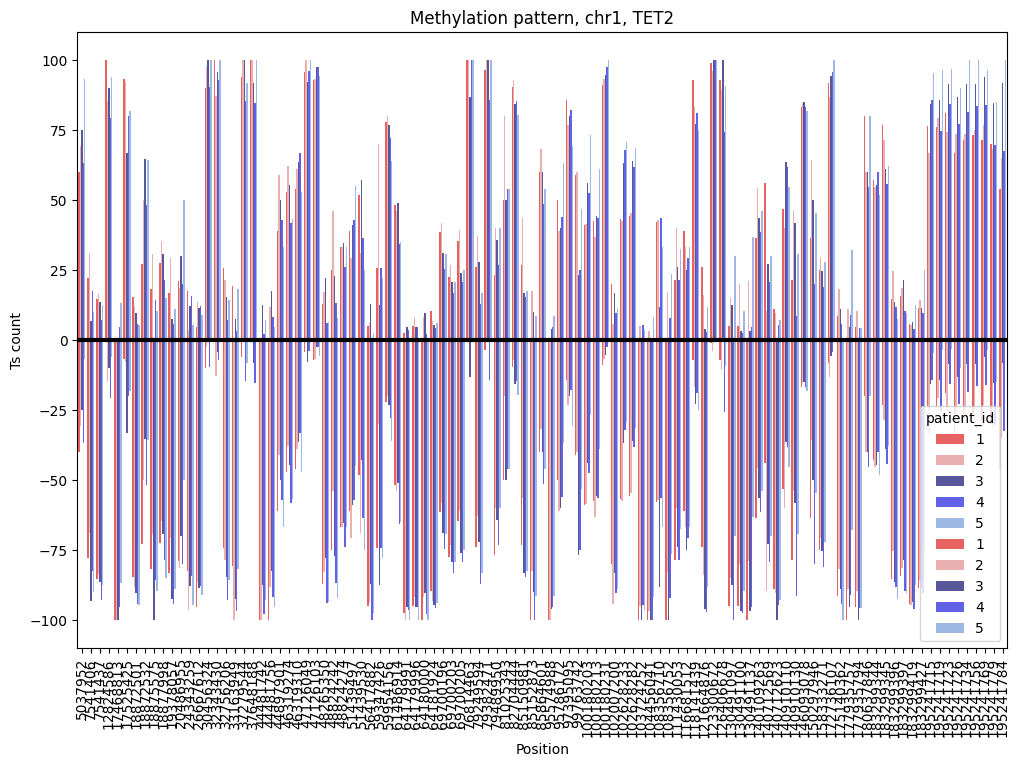

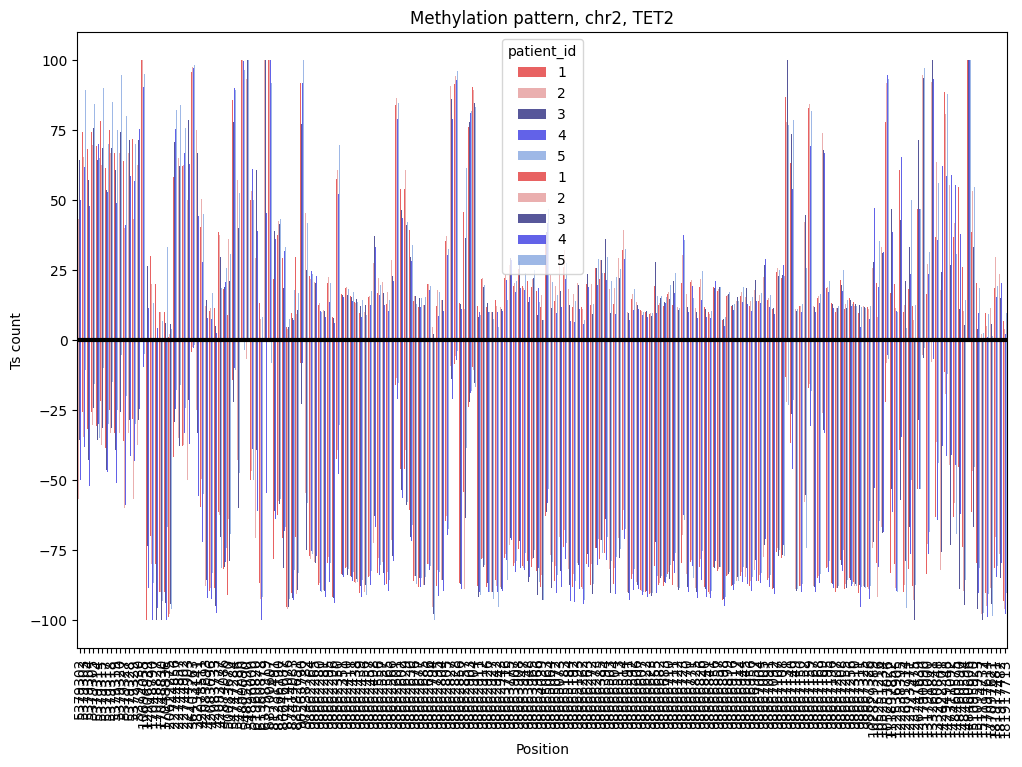

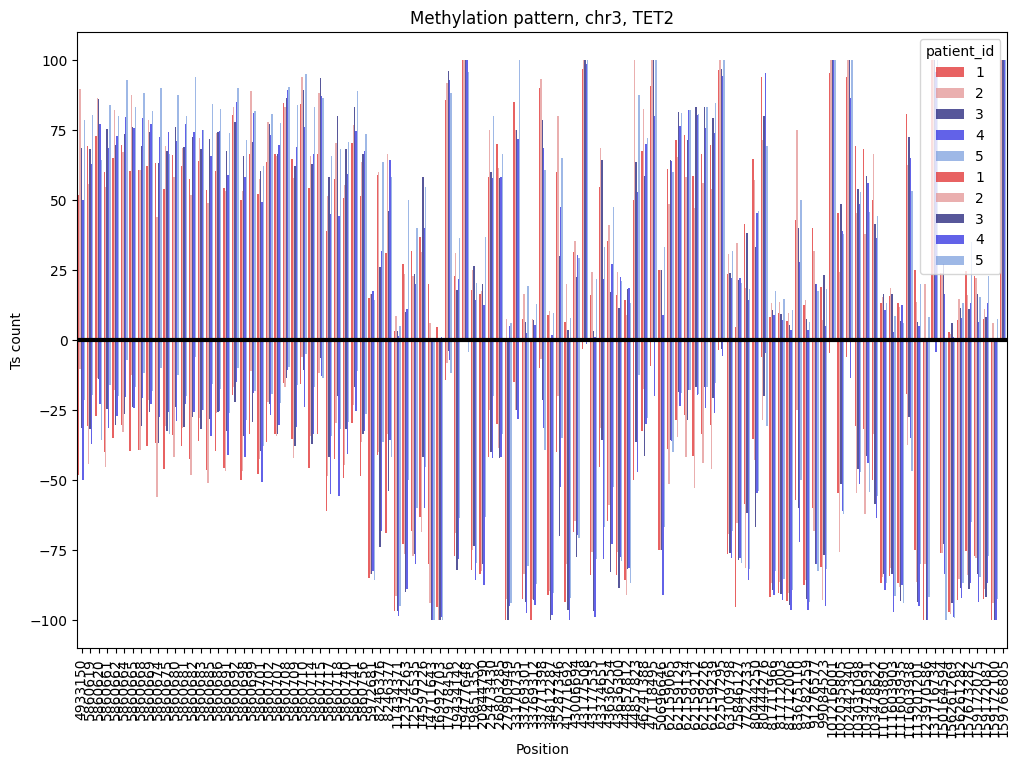

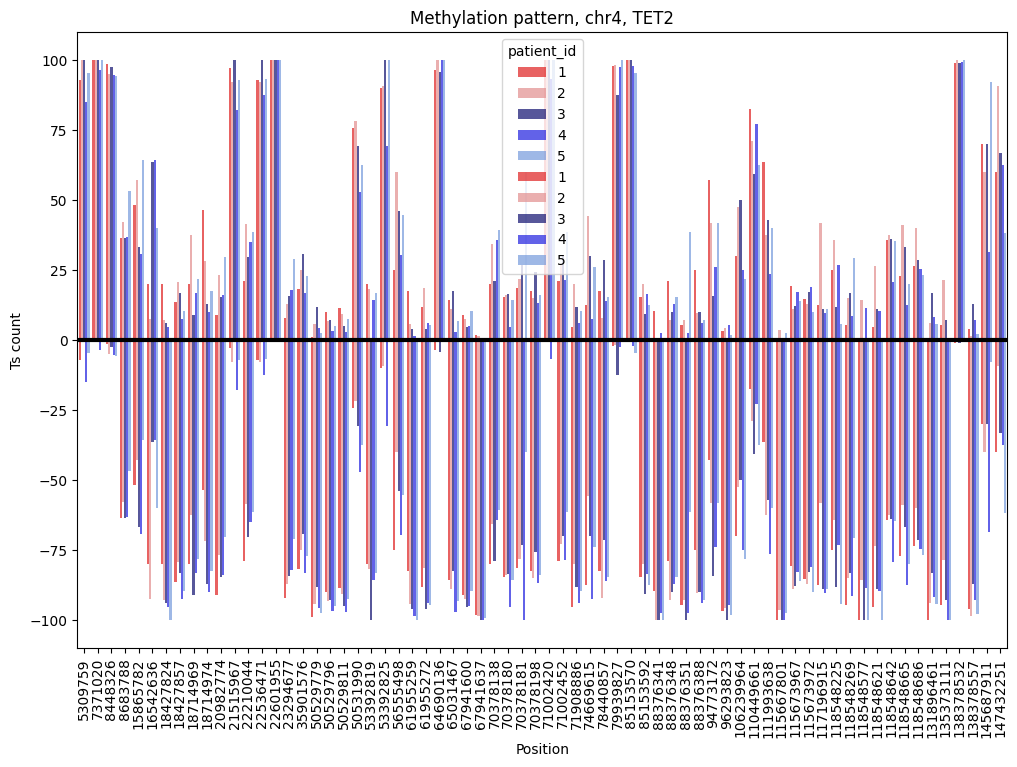

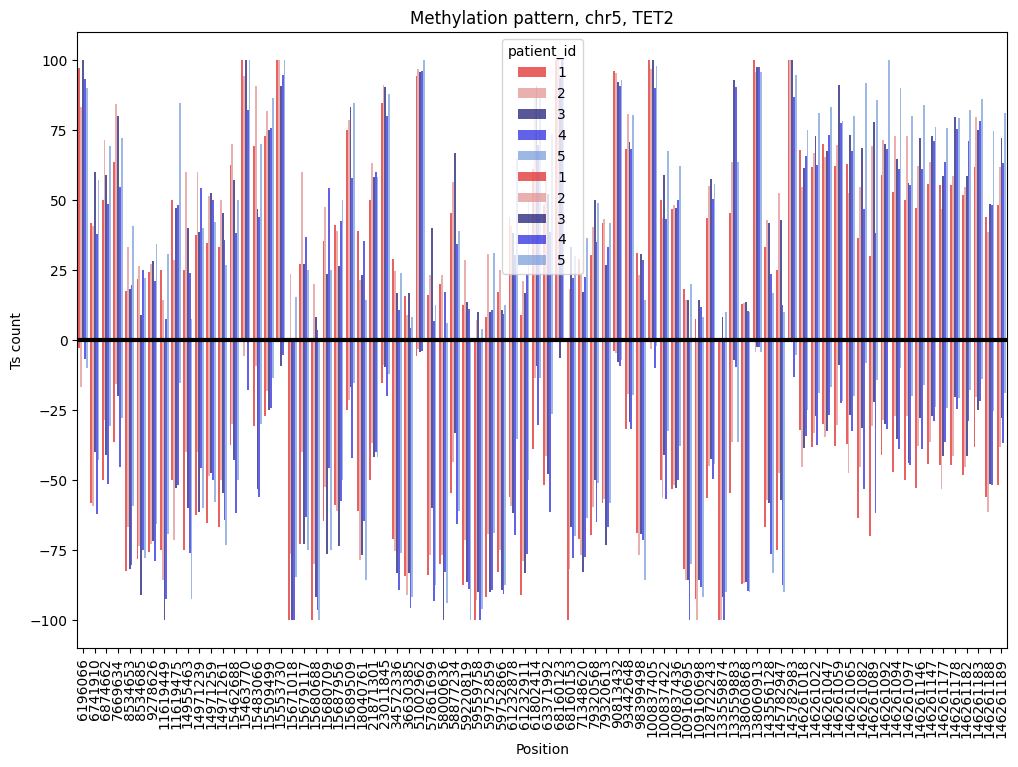

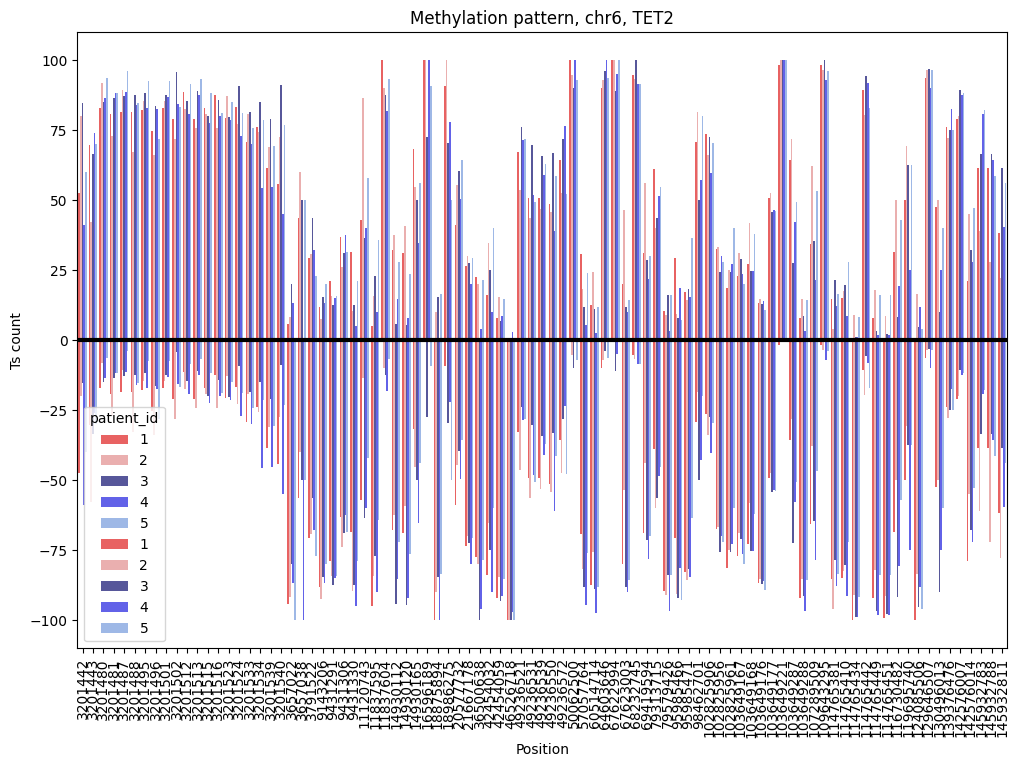

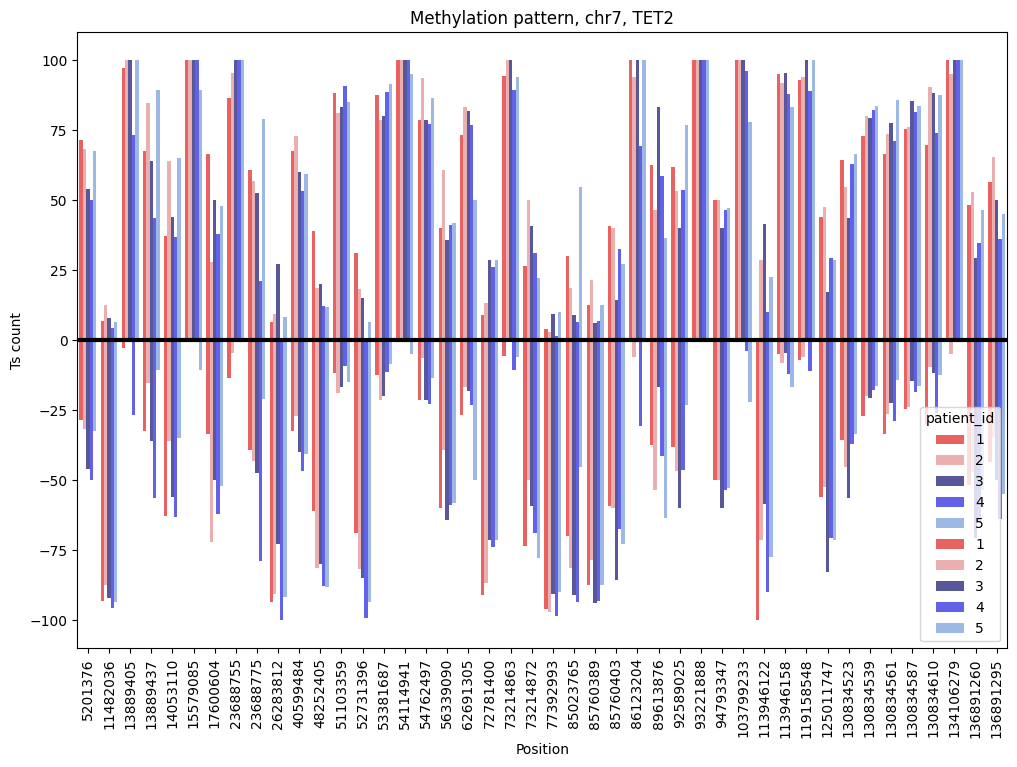

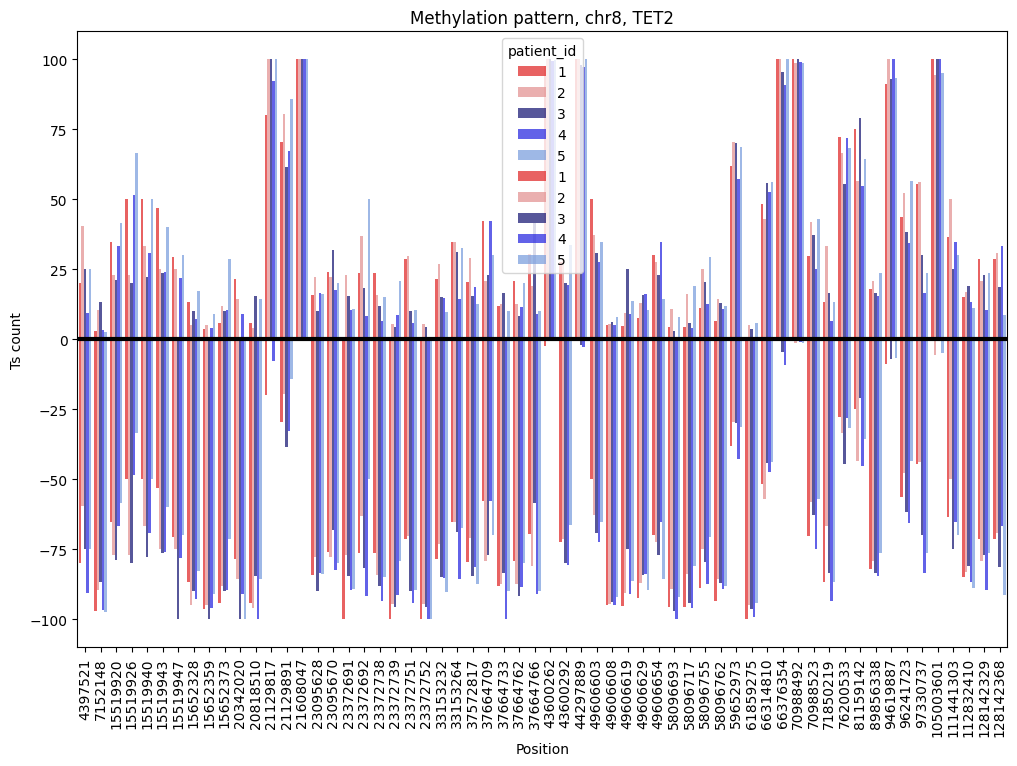

/work/iku/exp1019-cancer-epigenetics-and-ervs/virt/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


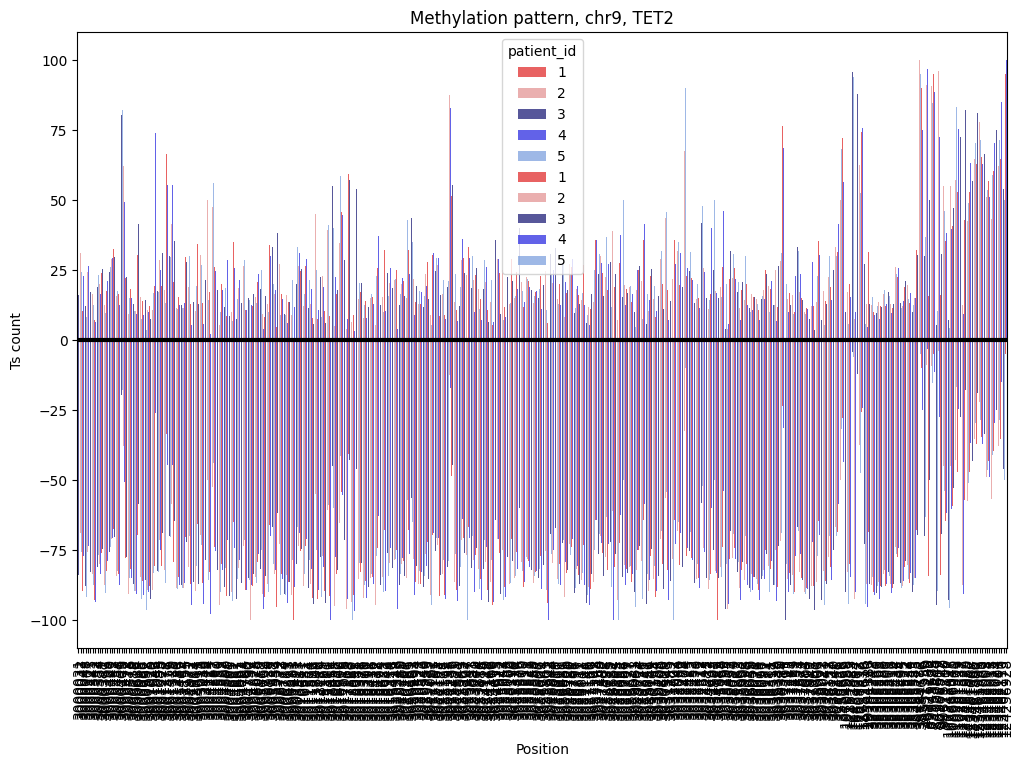

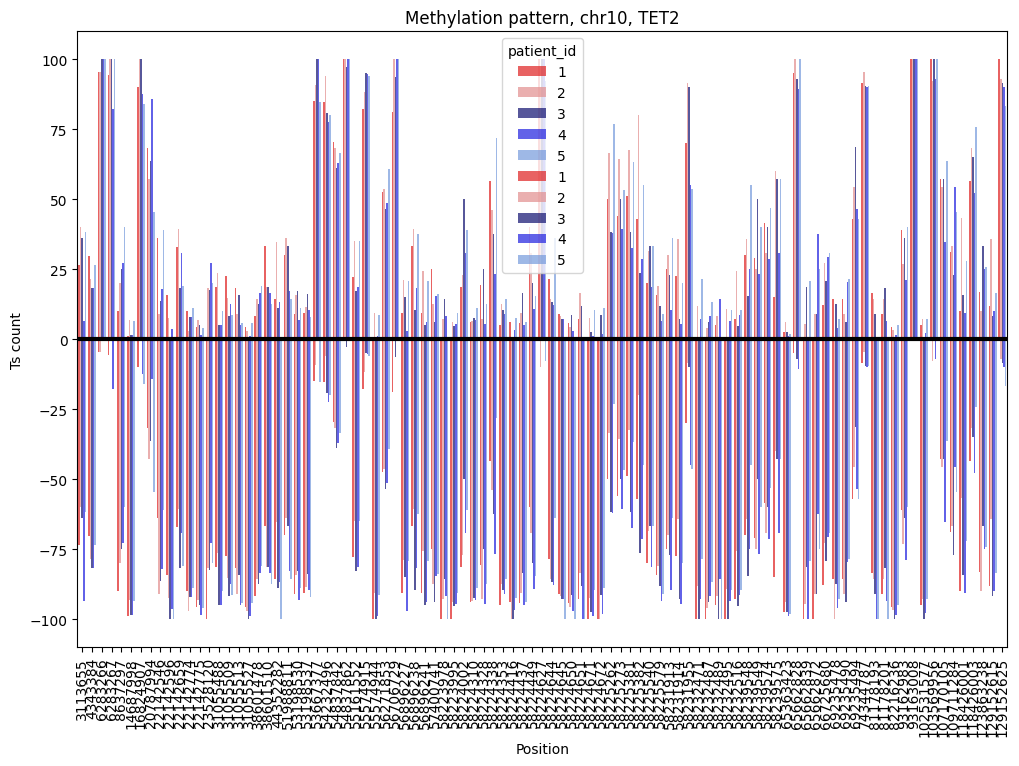

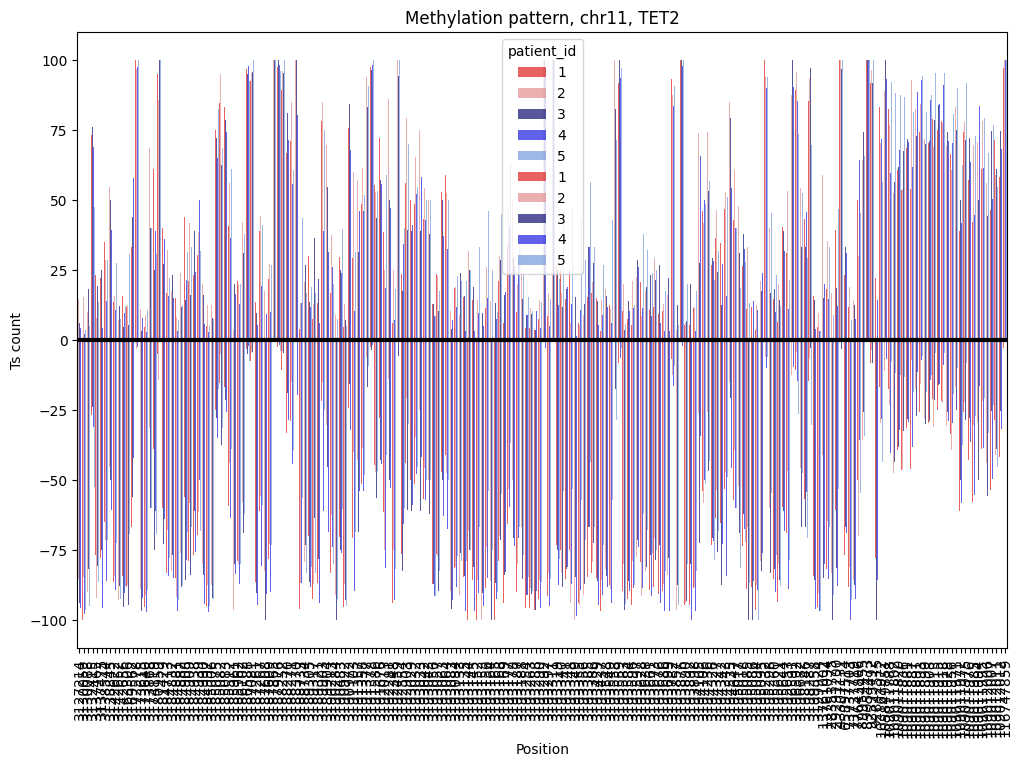

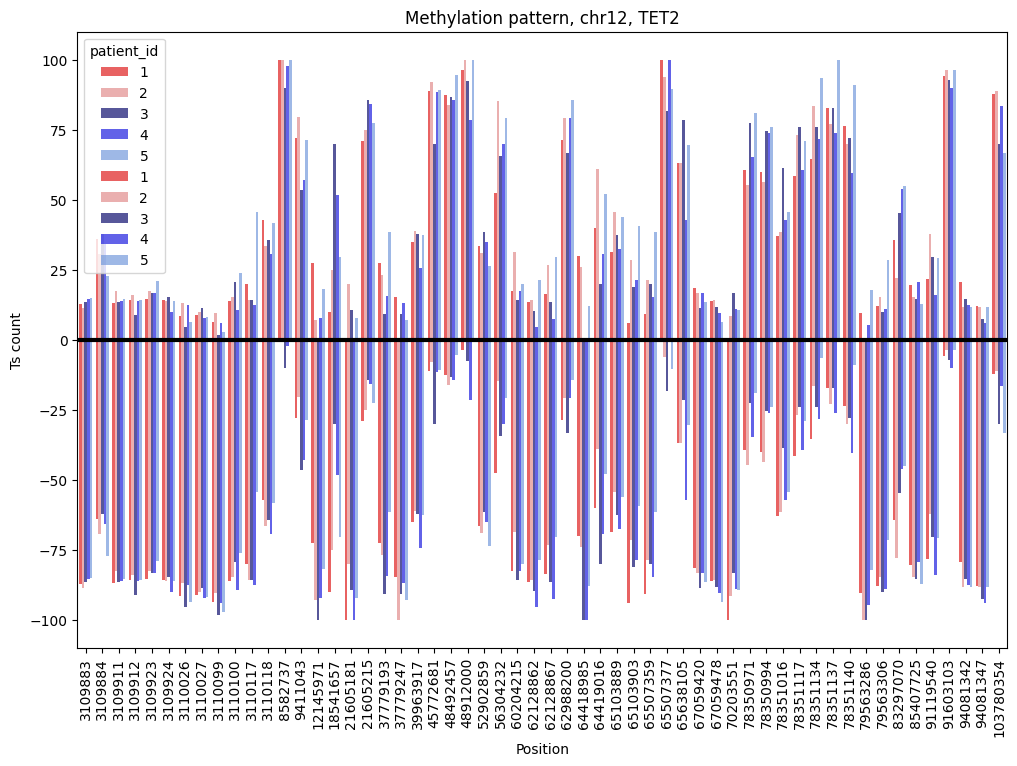

In [37]:
plot_meth_pattern(chr1_re, 'chr1', palette = 'tab10', savefig = False)
plot_meth_pattern(chr2_re, 'chr2', palette = 'tab10', savefig = False)
plot_meth_pattern(chr3_re, 'chr3', palette = 'tab10', savefig = False)
plot_meth_pattern(chr4_re, 'chr4', palette = 'tab10', savefig = True)
plot_meth_pattern(chr5_re, 'chr5', palette = 'tab10', savefig = False)
plot_meth_pattern(chr6_re, 'chr6', palette = 'tab10', savefig = False)
plot_meth_pattern(chr7_re, 'chr7', palette = 'tab10', savefig = False)
plot_meth_pattern(chr8_re, 'chr8', palette = 'tab10', savefig = True)
plot_meth_pattern(chr9_re, 'chr9', palette = 'tab10', savefig = False)
plot_meth_pattern(chr10_re, 'chr10', palette = 'tab10', savefig = False)
plot_meth_pattern(chr11_re, 'chr11', palette = 'tab10', savefig = False)
plot_meth_pattern(chr12_re, 'chr12', palette = 'tab10', savefig = False)


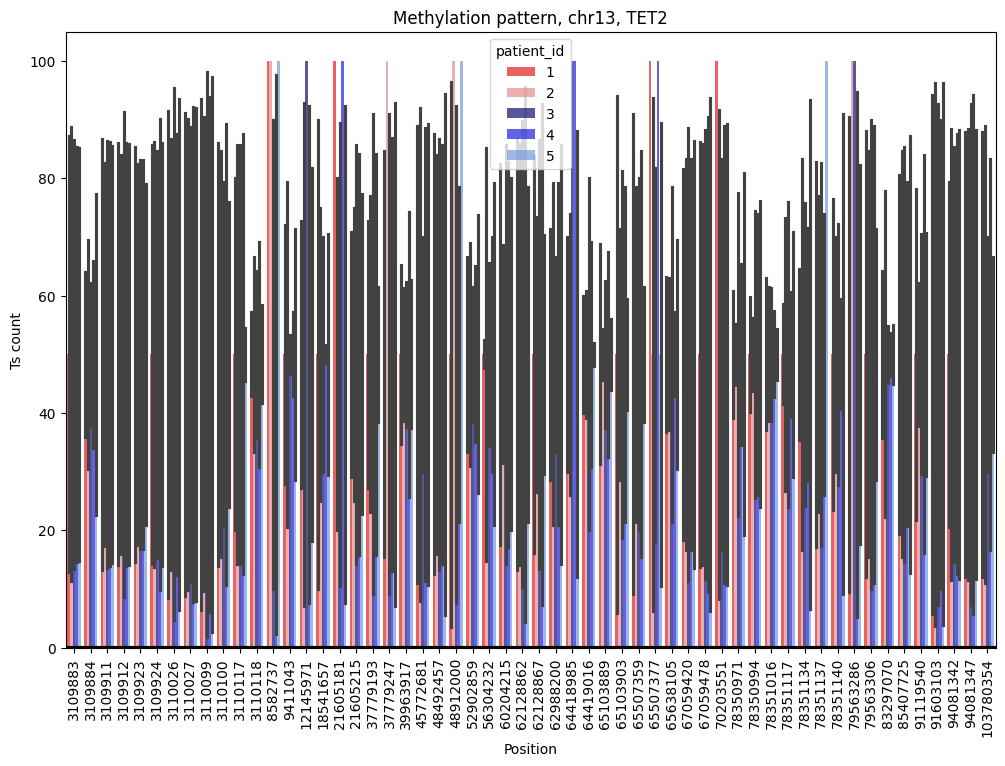

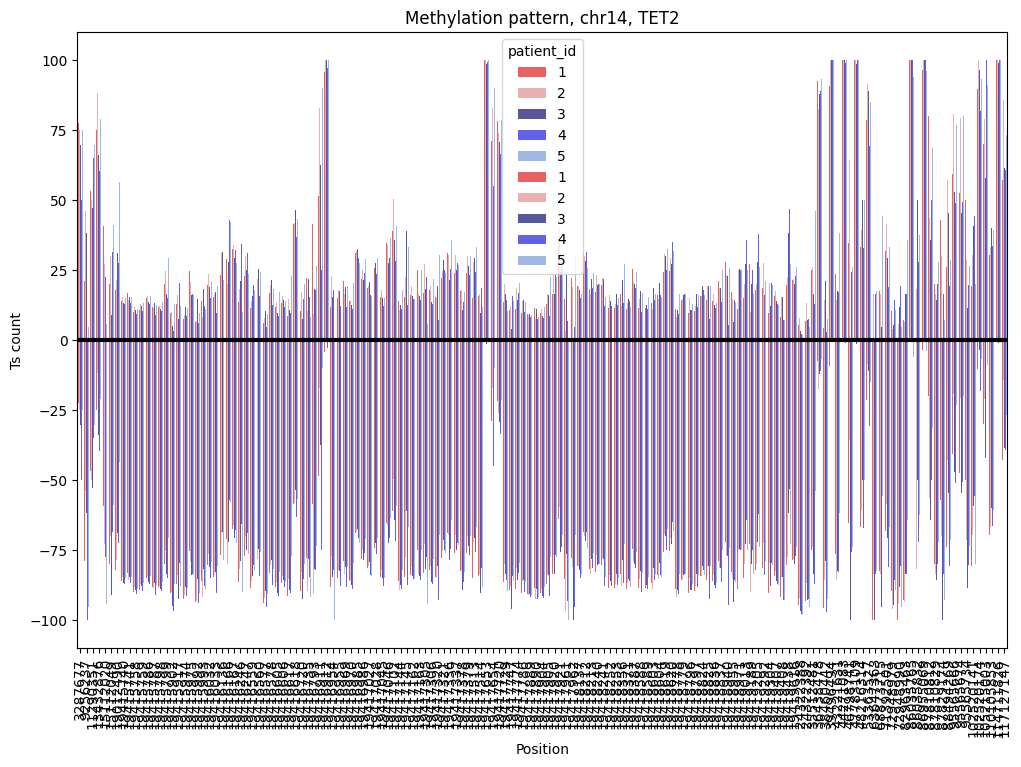

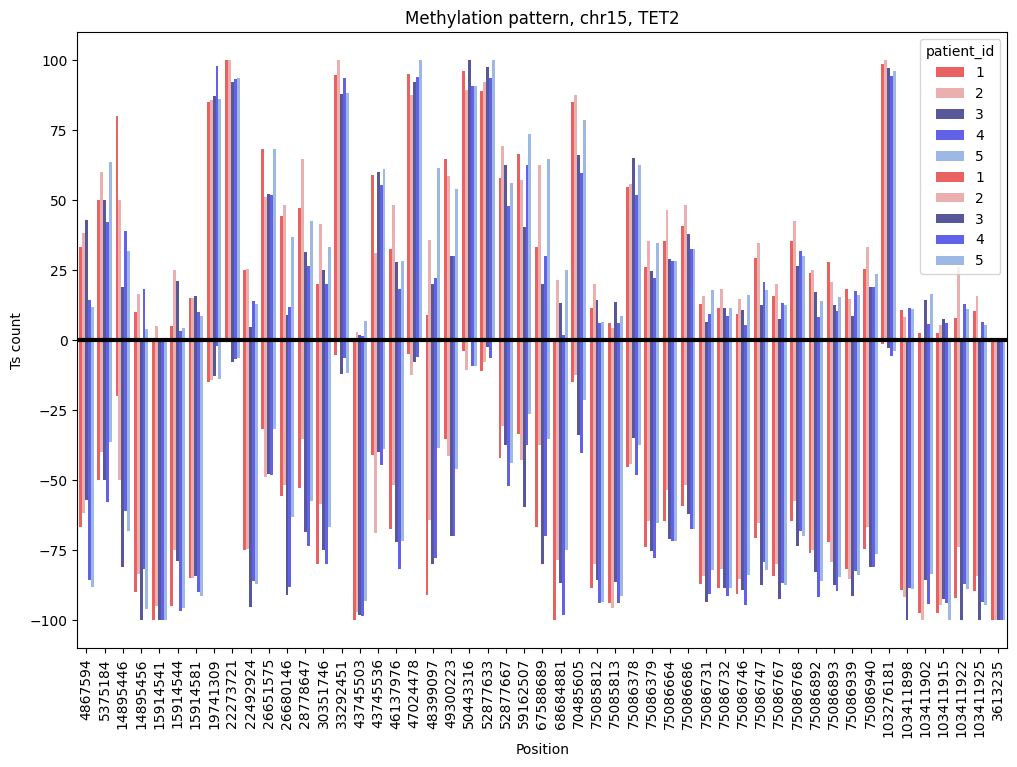

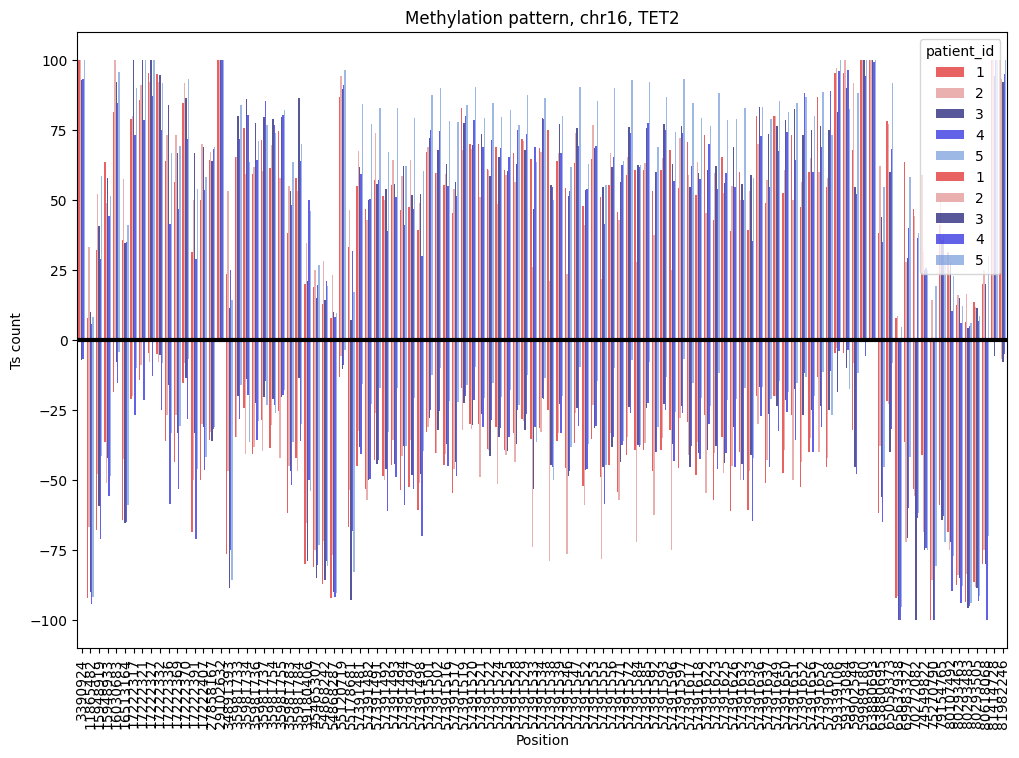

/tmp/ipykernel_2687656/3847293787.py:26: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(name)
/work/iku/exp1019-cancer-epigenetics-and-ervs/virt/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


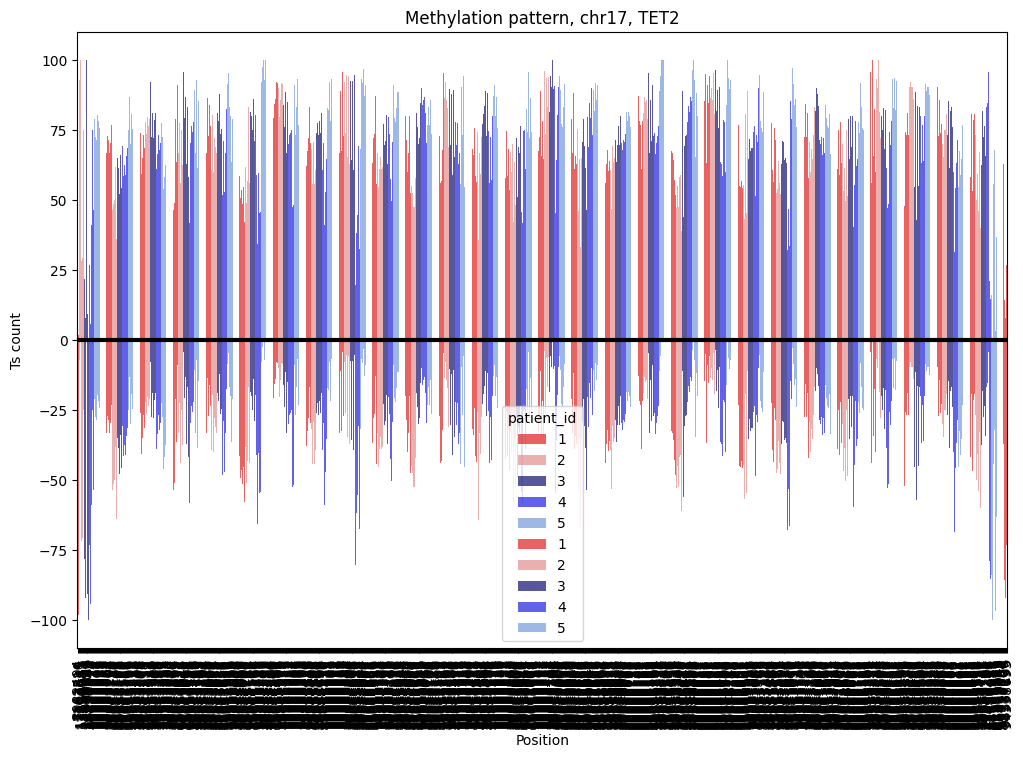

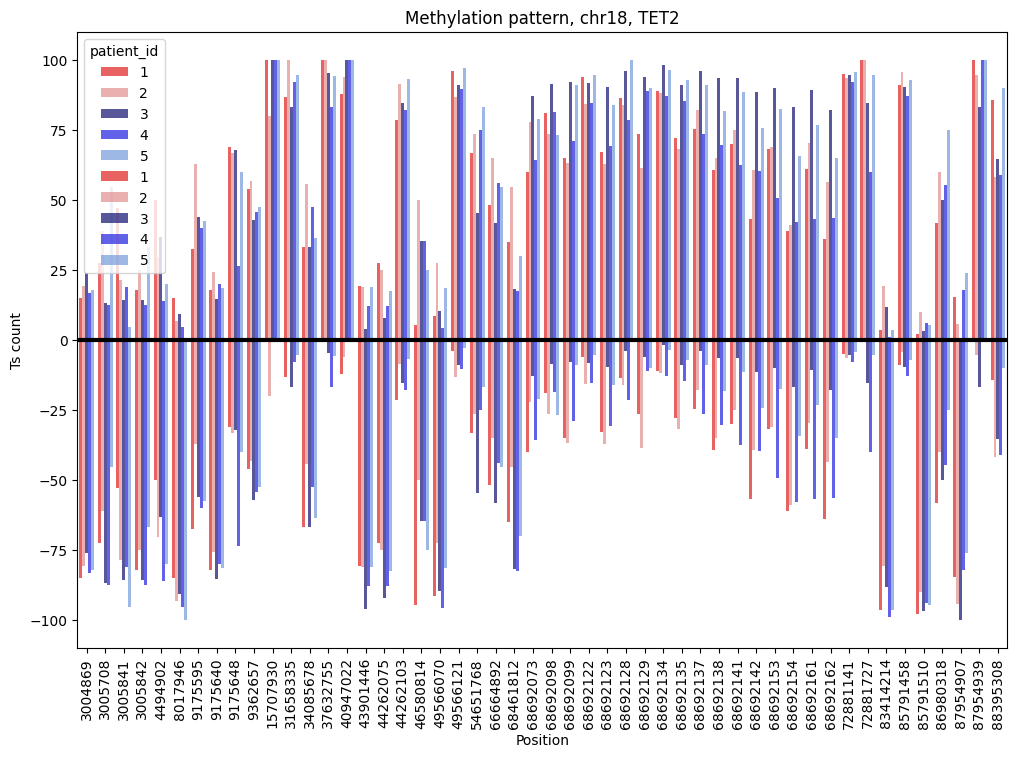

/work/iku/exp1019-cancer-epigenetics-and-ervs/virt/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


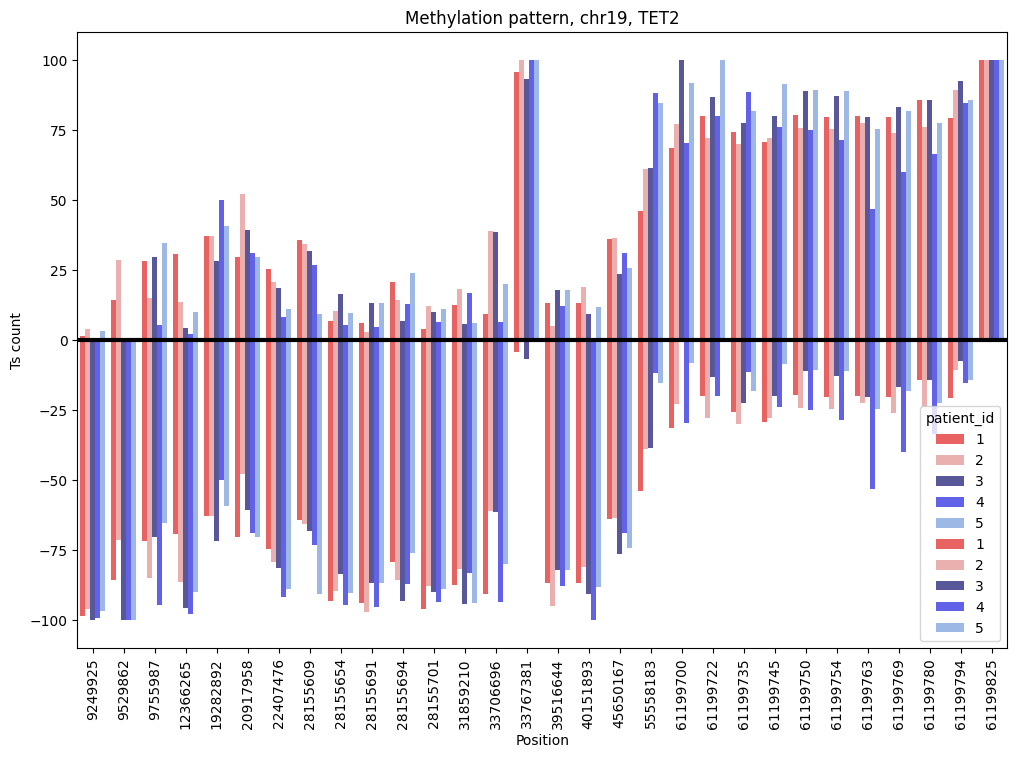

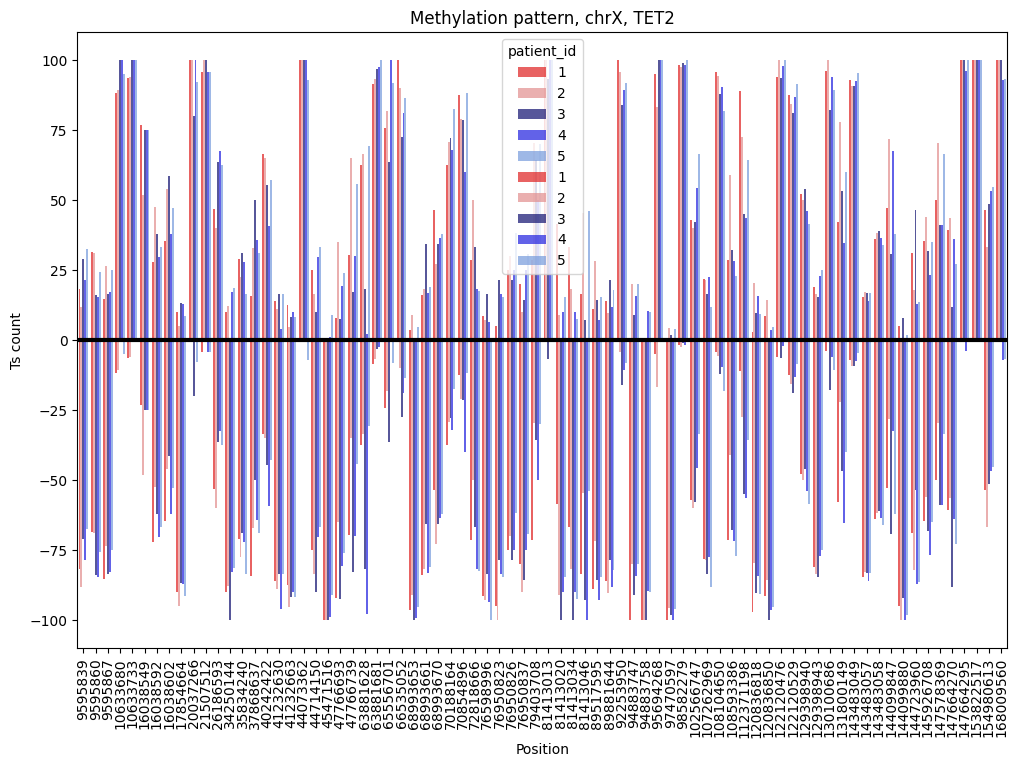

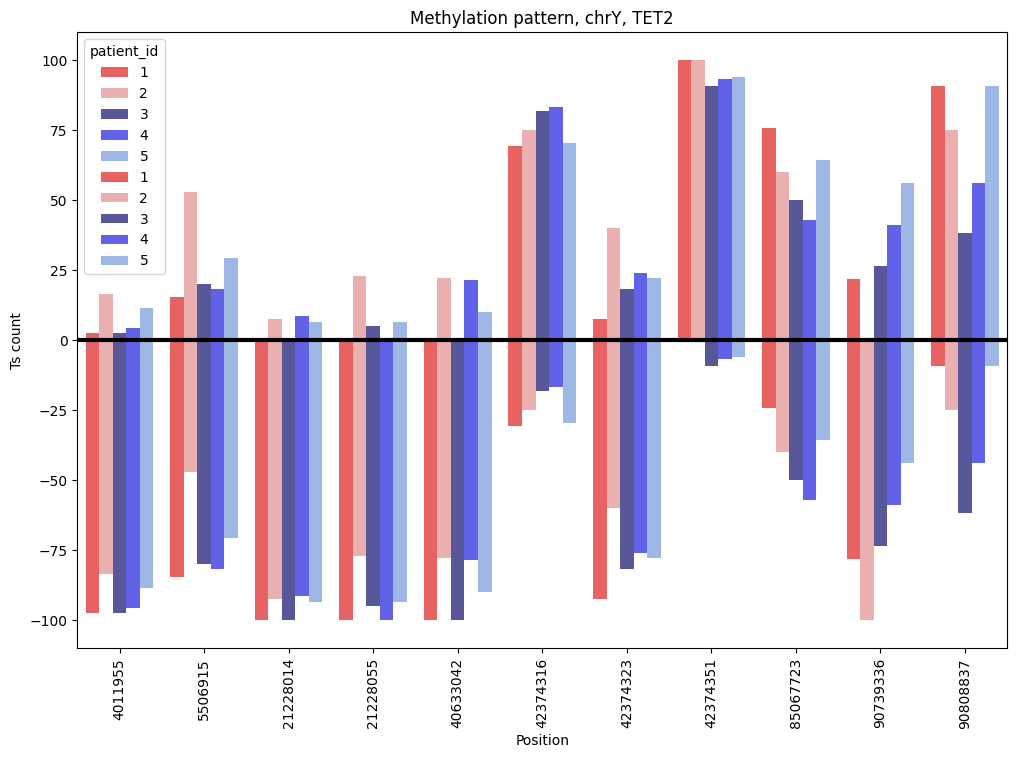

In [38]:
plot_meth_pattern(chr13_re, 'chr13', palette = 'tab10', savefig = False)
plot_meth_pattern(chr14_re, 'chr14', palette = 'tab10', savefig = False)
plot_meth_pattern(chr15_re, 'chr15', palette = 'tab10', savefig = True)
plot_meth_pattern(chr16_re, 'chr16', palette = 'tab10', savefig = False)
plot_meth_pattern(chr17_re, 'chr17', palette = 'tab10', savefig = True)
plot_meth_pattern(chr18_re, 'chr18', palette = 'tab10', savefig = False)
plot_meth_pattern(chr19_re, 'chr19', palette = 'tab10', savefig = False)
plot_meth_pattern(chrX_re, 'chrX', palette = 'tab10', savefig = False)
plot_meth_pattern(chrY_re, 'chrY', palette = 'tab10', savefig = False)